In [1]:
%% Initialization
clear ; close all; clc

Visualizing example dataset for PCA.



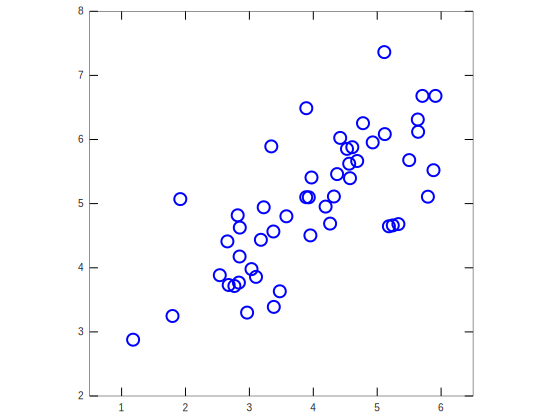

In [2]:
%% ================== Part 1: Load and Visualize Example Dataset  ===================
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the
%  variable X in your environment
load ('./data/ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;


Running PCA on example dataset.

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 


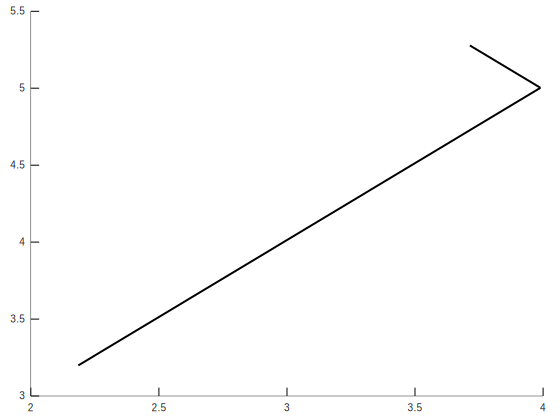

In [3]:
%% =============== Part 2: Principal Component Analysis ===============
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));


Dimension reduction on example dataset.

Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



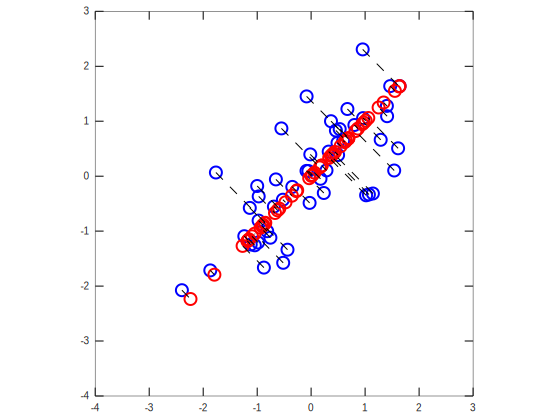

In [4]:
%% =================== Part 3: Dimension Reduction ===================
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off


Loading face dataset.



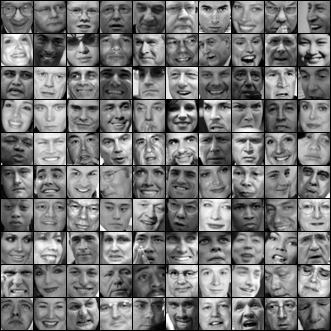

In [5]:
%% =============== Part 4: Loading and Visualizing Face Data =============
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('./data/ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));


Running PCA on face dataset.
(this might take a minute or two ...)



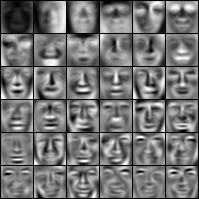

In [6]:
%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this might take a minute or two ...)\n\n']);

%  Before running PCA, it is important to first normalize X by subtracting
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

In [7]:
%% ============= Part 6: Dimension Reduction for Faces =================

fprintf('\nDimension reduction for face dataset.\n\n');

K = 100;
Z = projectData(X_norm, U, K);

fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));


Dimension reduction for face dataset.

The projected data Z has a size of: 
5000 100 
The projected data Z has a size of: 5000 100 



Visualizing the projected (reduced dimension) faces.



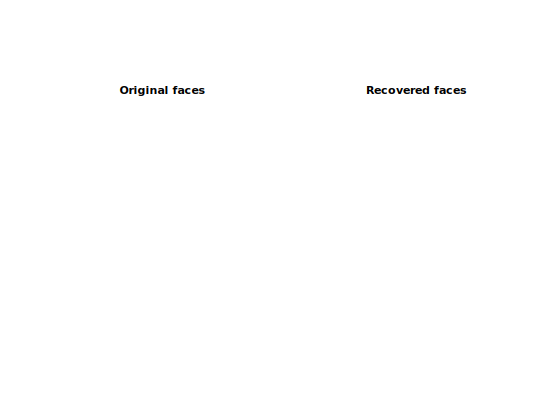

In [8]:
%% ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

In [10]:
%% ======================  PCA for Visualization ==========================
close all; close all; clc

% Reload the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('./data/bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16;
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


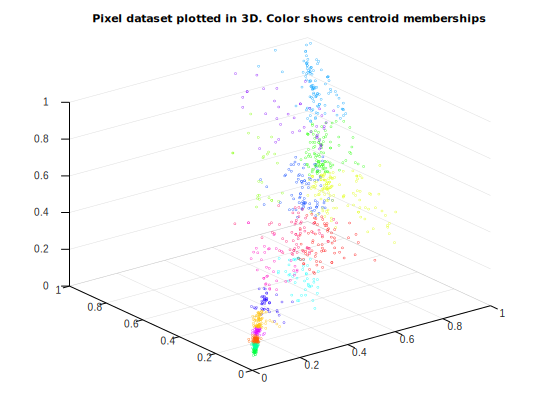

In [11]:
%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');

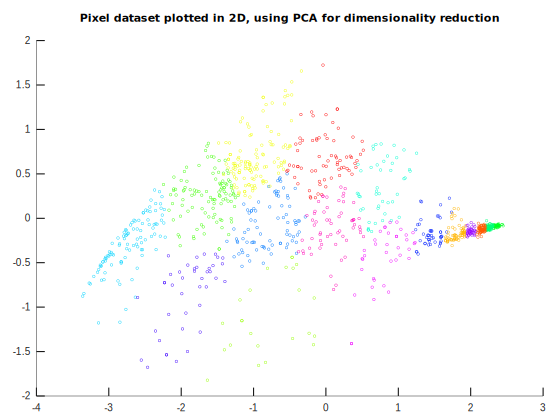

In [12]:
% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');